<div style="display: flex; background-color: #3F579F;">
    <h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px; color:#fff;" align="center">Deploy a model in the cloud - P8</h1>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 5px 30px 0px 30px;" >
    <h3 style="width: 100%; text-align: center; float: left; font-size: 24px; color:#fff;" align="center">| Notebook - Proof of Concept |</h3>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 10px 30px 30px 30px;">
    <h4 style="width: 100%; text-align: center; float: left; font-size: 24px; color:#fff;" align="center">Data Scientist course - OpenClassrooms</h4>
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">1. Libraries</h2>
</div>

In [1]:
## General
import os
from io import BytesIO
import pandas as pd
from PIL import Image

## To use S3 files
import boto3
from sagemaker import get_execution_role

## To use Spark
import pyspark

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">2. Testing connection to S3</h2>
</div>

In [2]:
conn = boto3.client('s3')
bucket = "oc-p8-bucket"

In [3]:
contents = conn.list_objects(Bucket=bucket)["Contents"]
for k in list(contents)[:5]:
    print(k['Key'])

application_test.csv
test/
test/application_test.csv
test/images/
test/images/Apricot/0_100.jpg


<div class="alert alert-block alert-info">
    <p>Now, we are going to test whether we can read an image from S3.</p>
</div>

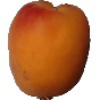

In [4]:
test_img = Image.open(
            BytesIO(
                conn.get_object(
                    Bucket=bucket, 
                    Key=list(contents)[5]["Key"])["Body"].read()
            )
        )

test_img